In [14]:
! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [20]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import plotly.express as px
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn.objects as so
import matplotlib.pyplot as plt

In [2]:
# importando dados
df = pd.read_csv('df_esteroids_MB_IN_AR.csv', sep = ';')
df.columns = df.columns.astype(str)
df.columns = ["".join(c if c.isalnum() else "_" for c in str(col)) for col in df.columns]
df

,Classe,__M__,__M_15__,_M_29__,_M_90__,_M_2_90__,_M_3_90_,_M_90_15__,_M_2_90_15__,_M_3_90_15_,...,_M_140_,_M_157_,_M_144_,m_z_103,m_z_129,m_z_143,m_z_169,m_z_244,_m_z_218,m_z_231
0,2,3,3,0,0,0,0,3,3,0,...,0,0,0,0,1,1,2,0,0,0
1,0,3,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,3,1,0,0,0,0,0,0,0,...,1,0,0,0,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,6,2,1,0,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
154,6,3,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,3
155,6,3,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
156,6,1,2,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
# separando variáveis descritoras
Xi = df.iloc[:,1::]
Xi

,__M__,__M_15__,_M_29__,_M_90__,_M_2_90__,_M_3_90_,_M_90_15__,_M_2_90_15__,_M_3_90_15_,_M_90_29__,...,_M_140_,_M_157_,_M_144_,m_z_103,m_z_129,m_z_143,m_z_169,m_z_244,_m_z_218,m_z_231
0,3,3,0,0,0,0,3,3,0,0,...,0,0,0,0,1,1,2,0,0,0
1,3,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2,1,0,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,3,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,3
155,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
156,1,2,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
# variável target
# separando classe 0(nao-derivado de esteroide) e 1
from collections import Counter

# Supondo que df seja o seu DataFrame

# Inicializando uma nova coluna 'Classe_bin' com valor padrão 0
df['Classe_AAS'] = 0

# Atribuindo valor 1 para o intervalo [91:,:]
df.loc[92:, 'Classe_AAS'] = 1

# Exibindo as contagens após a separação
counter = Counter(df['Classe_AAS'])
y = df['Classe_AAS']
y = np.array(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [5]:
# balanceando os dados 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Separando classe 0 (não derivado de esteroide) e 1
y = np.where(df['Classe_AAS'].values == 0, 0, 1)
y = np.array(y)
y = y.ravel()
# Verificando a contagem inicial das classes
print("Contagem inicial das classes:", Counter(y))

# Aplicando UnderSampler usando RandomUnderSampler
rs = RandomUnderSampler(random_state=42)
xi_resampled, y_resampled = rs.fit_resample(Xi, y)

# Verificando a contagem após o UnderSampler
print("Contagem após UnderSampler:", Counter(y_resampled))

Contagem inicial das classes: Counter({0: 92, 1: 66})
Contagem após UnderSampler: Counter({0: 66, 1: 66})


In [6]:
# importando modelos
modelo_XGB = pickle.load(open('XGradientBoosting_anabolizante_model.pkl', 'rb'))
modelo_RF = pickle.load(open('RandomForest_anabolizante_model.pkl', 'rb'))


In [7]:
# separando amostras de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(xi_resampled, y_resampled, test_size=0.33, random_state=29, shuffle=True, stratify=y_resampled)

In [8]:
# predição probabilistica
## RF
modelo_RF = modelo_RF.fit(X_train,y_train)
pred_RF = modelo_RF.predict_proba(X_test)[:, 1]
y_pred_RF = modelo_RF.predict(X_test)
## XGB
modelo_XGB = modelo_XGB.fit(X_train,y_train)
pred_XGB = modelo_XGB.predict_proba(X_test)[:, 1]
y_pred_XGB = modelo_XGB.predict(X_test)

In [9]:
df_compare = pd.DataFrame(y_pred_XGB,pred_XGB)
df_compare

,0
0.003903,0
0.001363,0
0.002770,0
0.002799,0
0.001543,0
0.992365,1
0.007161,0
0.004525,0
0.001454,0
0.993741,1


In [10]:
# confusion matrix RF

cf_matrix = confusion_matrix(y_test, y_pred_RF)
print(cf_matrix)

[[20  2]
 [ 0 22]]


<Axes: >

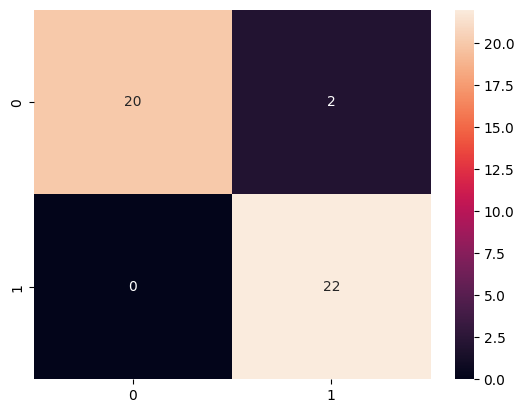

In [11]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [12]:
# confusion matrix XGB

cf_matrix = confusion_matrix(y_test, y_pred_XGB)
print(cf_matrix)

[[20  2]
 [ 1 21]]


<Axes: >

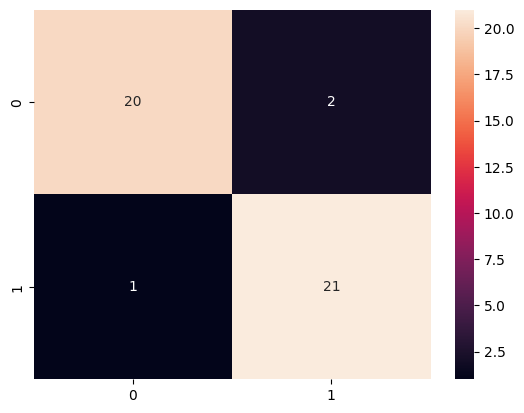

In [13]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

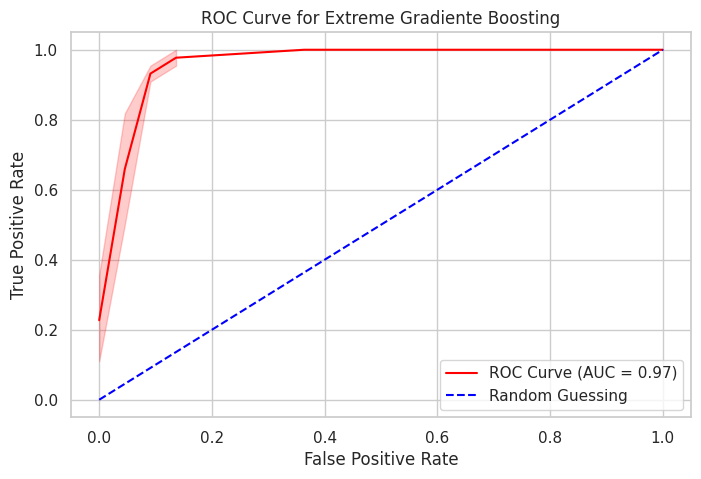

In [16]:
# Supondo que 'pred_XGB' é a probabilidade prevista pelo modelo
fpr, tpr, thresholds = roc_curve(y_test, pred_XGB)
roc_auc = auc(fpr, tpr)

# Criar a curva ROC com Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))

# Curva ROC
sns.lineplot(x=fpr, y=tpr, color='red', label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Linha de chute aleatório
plt.plot([0, 1], [0, 1], color='blue', linestyle='dashed', label='Random Guessing')

# Configurações do gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Extreme Gradiente Boosting')
plt.legend()
plt.show()

In [31]:
plt.savefig("roc_curve_XGB.jpg", dpi=600)

<Figure size 640x480 with 0 Axes>

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, pred_RF)

In [27]:
thresholds

array([       inf, 0.94951131, 0.92897727, 0.92897252, 0.90653474,
       0.89754978, 0.86025995, 0.84888629, 0.83747447, 0.80894003,
       0.5793481 , 0.10671937, 0.06645963, 0.06060606, 0.01581028,
       0.        ])

In [28]:
help(roc_curve)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC).
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : array-like of shape (n_samples,)
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int, float, bool or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
        `

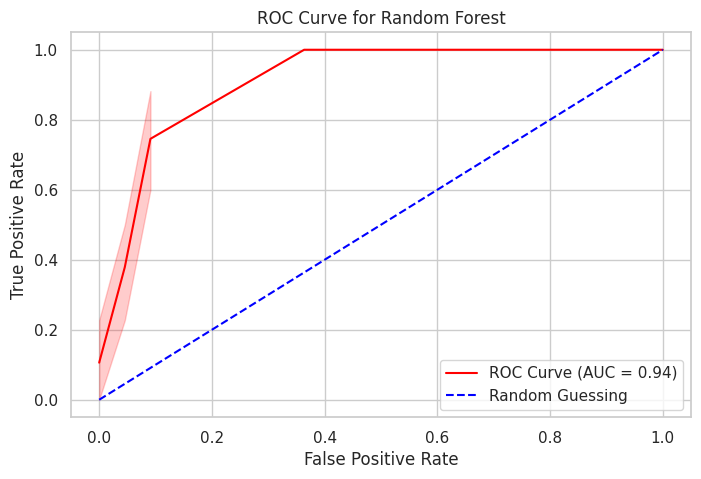

In [43]:
# Supondo que 'pred_RF' é a probabilidade prevista pelo modelo
fpr, tpr, thresholds = roc_curve(y_test, pred_RF)
roc_auc = auc(fpr, tpr)

# Criar a curva ROC com Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))

# Curva ROC
sns.lineplot(x=fpr, y=tpr, color='red', label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Linha de chute aleatório
plt.plot([0, 1], [0, 1], color='blue', linestyle='dashed', label='Random Guessing')

# Configurações do gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

In [47]:
len(set(pred_RF))

30

In [44]:
len(thresholds)

16

In [32]:
plt.savefig("roc_curve_RF.jpg", dpi=600)

<Figure size 640x480 with 0 Axes>

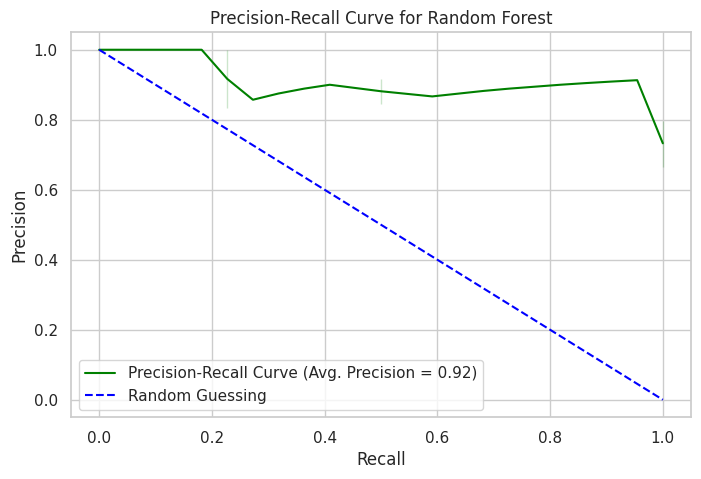

In [29]:
# PR curve RF
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# Supondo que 'pred_RF' é a probabilidade prevista pelo modelo
precision, recall, thresholds = precision_recall_curve(y_test, pred_RF)
average_precision = average_precision_score(y_test, pred_RF)

# Criar a curva Precision-Recall com Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))

# Curva Precision-Recall
sns.lineplot(x=recall, y=precision, color='green', label=f'Precision-Recall Curve (Avg. Precision = {average_precision:.2f})')
# Linha de chute aleatório
plt.plot([0, 1], [1, 0], color='blue', linestyle='dashed', label='Random Guessing')

# Configurações do gráfico
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend()
plt.show()


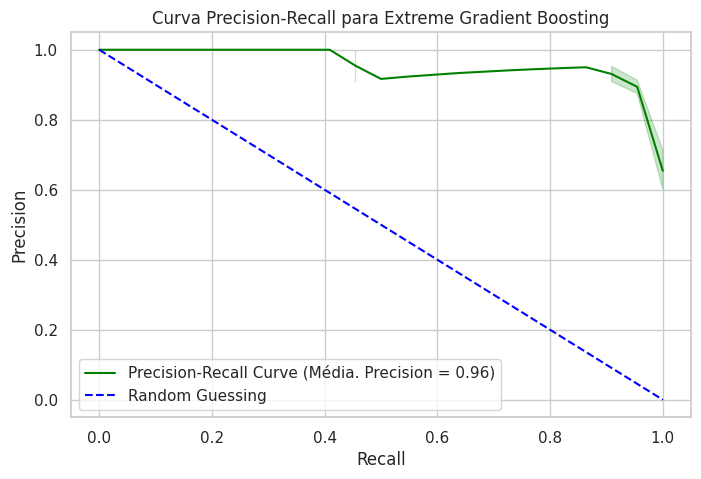

In [38]:
# PR curve RF
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# Supondo que 'pred_RF' é a probabilidade prevista pelo modelo
precision, recall, thresholds = precision_recall_curve(y_test, pred_XGB)
average_precision = average_precision_score(y_test, pred_XGB)

# Criar a curva Precision-Recall com Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))

# Curva Precision-Recall
sns.lineplot(x=recall, y=precision, color='green', label=f'Precision-Recall Curve (Média. Precision = {average_precision:.2f})')
# Linha de chute aleatório
plt.plot([0, 1], [1, 0], color='blue', linestyle='dashed', label='Random Guessing')

# Configurações do gráfico
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall para Extreme Gradient Boosting')
plt.legend()
plt.show()

In [22]:
def mcc_f1(ground_truths, predicted_values):
    
    """
    The function mcc_f1 calculates MCC and F1 scores based on varying thresholds identifed by the PRC function
    based on inputs -  ground truth vaules and predicted values.
    
    Parameters
    ----------
    ground_truths, predicted_values : numpy.ndarray;
                        Input arrays; groundtruth values (True values) and predicted values.
    
    Returns
    -------
    mcc, f1, thresholds: numpy.ndarray;
                           Output arrays; Unit normalized MCC scores and F1 score values 
                           for every threshold.           
    """
    
    mcc = []   
    f1 = []
    
    # Generating thresholds with the PRC function
    precision, recall, thresholds = sklearn.metrics.precision_recall_curve(
                                    ground_truths, predicted_values)

    # For every value of the thresholds (cutoffs), calculate MCC and F1 scores :
    for T in thresholds:
        predicted_values_after_cutoff = predicted_values > T  # Positive classes are determined for every predicted value that exceeds the threshold. 
    
        mcc.append((sklearn.metrics.matthews_corrcoef(
                    ground_truths, predicted_values_after_cutoff)+1)*0.5) # get normalised MCC: change the range of MCC from [-1, 1] to [0, 1] 
        
        f1.append(sklearn.metrics.f1_score(
                    ground_truths, predicted_values_after_cutoff))
        
    mcc = np.array(mcc)
    f1 = np.array(f1)  
    
    # Resulting values are an array of MCC & F1 scores across different thresholds (cutoffs)  
    return mcc,f1, thresholds

# MCC-F1 Metric:
def MCC_F1_Metric(mcc,f1,thresholds, W_num_of_subranges = 100):
    
    """
    MCC_F1_Metric function computes the MCC-F1 metric i.e. the average distances between the predcition scores to the point of Perfect Performace (1,1) 
    and also results in the best threshold value
    
    Parameters
    ----------
    
    mcc,f1, thresholds : numpy.ndarray;
                        MCC and F1 scores across varying thresholds
    
    W_num_of_subranges : int, optional;
        Number of subranges- default = 100; 
        larger values of 𝑊 will cause the MCC-𝐹1 metric to capture the performance of a classifier more accurately.
    
    Returns
    -------
    MCC_F1_Met : float;
                The ratio of the average distance of the MCC-F1 score to the Point of Perfect Performace (1,1)
                A metric to compare classifier performance.
    
    Best_threshold : int;
                Index of the best prediction score threshold (𝑇), 
                Index of the point on the MCC-𝐹1 curve closest to the point of perfect performance (1,1).
    
    """
    
     
    subrange_intervals = np.linspace(np.min(mcc), np.max(mcc),W_num_of_subranges) # breaking into subranges
    
    # Computing MCC values per subrange
    
    values_per_subrange = np.zeros_like(subrange_intervals) # 'n' is the number of points per subrange
    for i in range(W_num_of_subranges-1):
        for j in mcc:
            if j >= subrange_intervals[i] and j < subrange_intervals[i+1]:
                values_per_subrange[i] = values_per_subrange[i] + 1

    # Calculating the distances between points in a subrange to the Point of perfect performance (1,1)            
    Distance_of_points_within_subrange = np.sqrt(((mcc-1)**2)+((f1-1)**2)) # calculating the Euclidean distance 𝐷𝑖            
    sum_of_distance_within_subrange = np.zeros_like(subrange_intervals)
    index = -1
    for value in mcc:
        index += 1
        for i in range(W_num_of_subranges-1):
                 if value >= subrange_intervals[i] and value < subrange_intervals[i+1]:
                        sum_of_distance_within_subrange[i] = sum_of_distance_within_subrange[i] + Distance_of_points_within_subrange[index]

    # Mean Distance across subranges
    mean_Distance_per_subrange = np.array(sum_of_distance_within_subrange/values_per_subrange)
    total_number_of_subranges = 0  
    total_sum_of_mean_distances = 0
    for i in mean_Distance_per_subrange:
        if not np.isnan(i):
            total_number_of_subranges += 1 
            total_sum_of_mean_distances += i # addition of all the means across subranges that have atleast 1 MCC value.

    grand_mean_distance = total_sum_of_mean_distances/total_number_of_subranges # P = total number of subranges that have atleast 1 MCC value
   
    """ 
    Compare the grand average distance to √2 (The distance between the point of worst performance (0,0) and 
    the point of perfect performance (1,1) is √2).That is the maximum possible distance between a point on the MCC-𝐹1 curve
    The ratio between the grand avgerage distance and √2 is taken.
    This ratio ranges between 0 and 1 (worst value = 0; best value = 1). To get the MCC-𝐹1 score, we subtract this ratio from 1
    """

    MCC_F1_Met = 1 - (grand_mean_distance /np.sqrt(2))
  
    
    # Finding the best threshold 𝑇 the point on the MCC-𝐹1 curve closest to the point of perfect performance (1,1).
   
    result = np.where(Distance_of_points_within_subrange == Distance_of_points_within_subrange.min())
    Best_threshold = result[0][0]
    
    print("MCC-F1 metric = {0:.2f}".format(MCC_F1_Met), "Best Threshold = {0:.2f}".format(thresholds[Best_threshold]))
    
    return MCC_F1_Met,Best_threshold

# Generating a plot (the overall canvas);
axis = None
def axis_plotting(total_plots): 
    global axis
    if axis == None:
        fig = plt.figure(figsize=(7,7))
        axis = []        
        for i in range(1,total_plots+1):
            ax = fig.add_subplot(total_plots, 1, i)
            axis.append(ax)
            
    
def plotting(mcc, f1, thresholds,MCC_F1_Met,Best_threshold,classifer_name = "",total_plots = 1,ax = 0):
    
        """
        Plotting function - fuction to plot the MCC and F1 scores (across varying Thresholds), and highlight the the MCC_F1 metric with the best threshold
        For multiple plots, 'total_plots' should be > 1 AND 'ax' (< total_plots) starting from  1
    
        Parameters
        ----------
        mcc,f1 : numpy.ndarray;
            MCC and F1 scores across varying thresholds
    
        MCC_F1_Met : float;
                The ratio of the average distance of the MCC-F1 score to the Point of Perfect Performace (1,1)
                A metric to compare classifier performance.
    
        Best_threshold : int;
                Index of the best prediction score threshold (𝑇), 
                Index of the point on the MCC-𝐹1 curve closest to the point of perfect performance (1,1).
                
        classifer_name : str, optional
                    default = ""
    
        total_plots: int, optional
                    Number of sub-plots to generate; default = 1
    
        ax : int, optional
            Index of subplot ([1,2,3...]); default = None
    
                            
        Returns
        -------
        
        MCC-F1 curve: 
            for multiple sublplots, adjust total_plots and ax input value.
                        
        """
        
        global axis
        if total_plots > 1 and ax < total_plots: # if more than 1 total plot is mentioned;
            axis_plotting(total_plots) #calling function to generate plot;
            if ax == 0:
                subplot = plt.gca() # plot on current axis value, 
            else:
                subplot = axis[ax-1] # plotting additional graphs based on index of the axis.
        elif ax > total_plots:
            print("Index inconsistent with total_plots")
        else:
            axis = None
            subplot = plt.gca() # plot on base plot if no additional subplots are needed
      
        # Labelling the plot;
        subplot.plot(f1,mcc)
        subplot.annotate(classifer_name + "_MCC_Met - {0:.2f}".format(
            MCC_F1_Met), 
                 (f1[Best_threshold],mcc[Best_threshold]), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='left') 
        
        subplot.scatter(f1[Best_threshold],mcc[Best_threshold],color='red')
        subplot.set(xlabel='F1 score',
               ylabel='unit−normalized MCC',title='MCC-F1 curve')
        
        # Inserting Random line
        subplot.axhline(0.5,linewidth=0.7, color='green',linestyle='--')
        subplot.annotate('Random line',xy =(0,0.5),xytext=(250,-15),
                    color='g', xycoords = subplot.get_yaxis_transform(), 
                    textcoords="offset points", va="bottom")


        # Displaying and labelling points of performances.

        subplot.scatter(1,1,color = 'black');subplot.scatter(0,0,color = 'black')
        subplot.annotate('Point of Perfect performance',(1,1),
                    textcoords="offset points",xytext=(-9,-2),ha='right')
        subplot.annotate('Point of Worst performance',(0,0)
                    ,textcoords="offset points",xytext=(9,2),ha='left')
        
        subplot.set_xticks(np.arange(0, 1.1, 0.25)); subplot.set_yticks(np.arange(0, 1.1, 0.25))
        subplot.set_xlim(-0.05,1.05); subplot.set_ylim(-0.05,1.05)
        subplot.grid(alpha = 0.3)

In [23]:
mcc,f1,thresholds = mcc_f1(y_test,pred_RF)

MCC_F1_Met,T_index = MCC_F1_Metric(mcc,f1,thresholds)

MCC-F1 metric = 0.71 Best Threshold = 0.25


/tmp/ipykernel_3930626/1868738544.py:93: RuntimeWarning: invalid value encountered in divide
  mean_Distance_per_subrange = np.array(sum_of_distance_within_subrange/values_per_subrange)


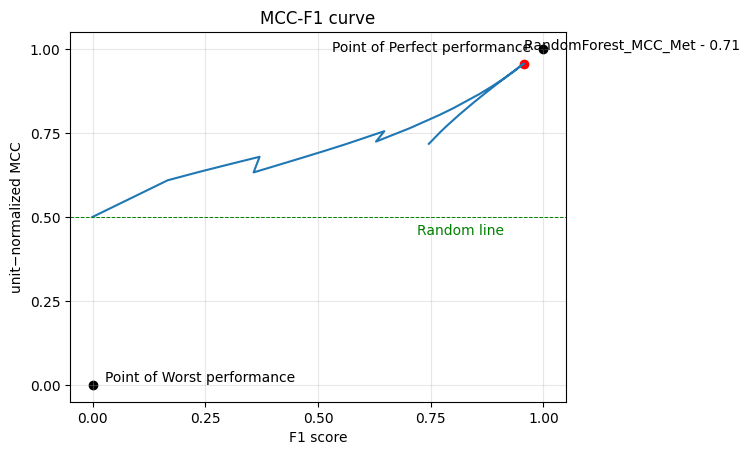

In [24]:
plotting(mcc,f1,thresholds,MCC_F1_Met,T_index,total_plots = 1,ax = 1,classifer_name ='RandomForest')

In [25]:
mcc,f1,thresholds = mcc_f1(y_test,pred_XGB)

MCC_F1_Met,T_index = MCC_F1_Metric(mcc,f1,thresholds)

MCC-F1 metric = 0.74 Best Threshold = 0.06


/tmp/ipykernel_3930626/1868738544.py:93: RuntimeWarning: invalid value encountered in divide
  mean_Distance_per_subrange = np.array(sum_of_distance_within_subrange/values_per_subrange)


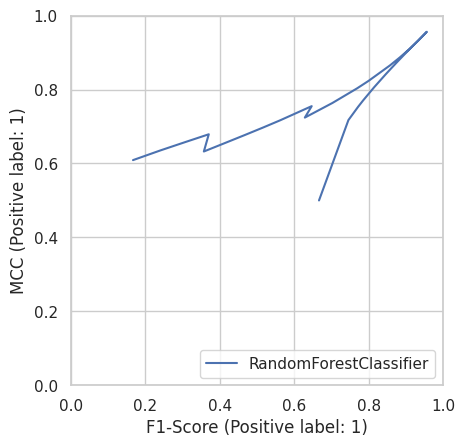

In [37]:
# MCC-F1
from mcc_f1 import mcc_f1_curve, plot_mcc_f1_curve
mcc, f1, thresholds = mcc_f1_curve(y_test, pred_RF)

# Plot MCC-F1 curve
plot_mcc_f1_curve(modelo_RF, X_test, y_test)

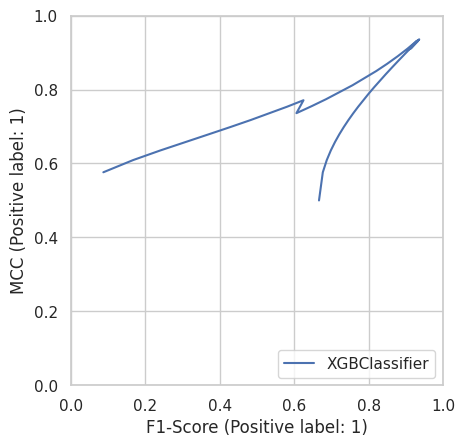

In [30]:
# MCC-F1
from mcc_f1 import mcc_f1_curve, plot_mcc_f1_curve
mcc, f1, thresholds = mcc_f1_curve(y_test, pred_XGB)

# Plot MCC-F1 curve
plot_mcc_f1_curve(modelo_XGB, X_test, y_test)

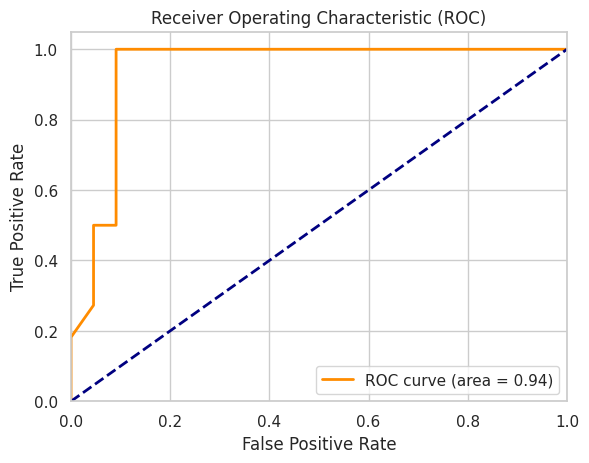

In [52]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Suponha que você tenha as probabilidades previstas (ou pontuações) de um modelo
y_pred_prob = pred_RF

# Suponha que você tenha os rótulos reais correspondentes
y_true = y_test

# Crie uma lista de thresholds que você deseja avaliar
#thresholds = np.linspace(0, 1, 100)  # Número de thresholds desejado
thresholds = np.arange(0, 1, 0.01)
tpr_list = []  # Para armazenar as taxas de verdadeiros positivos
fpr_list = []  # Para armazenar as taxas de falsos positivos

# Calcule TPR e FPR para cada threshold
for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Calcule a área sob a curva ROC
roc_auc = auc(fpr_list, tpr_list)

# Plote a curva ROC
plt.figure()
plt.plot(fpr_list, tpr_list, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [48]:
x = pred_RF

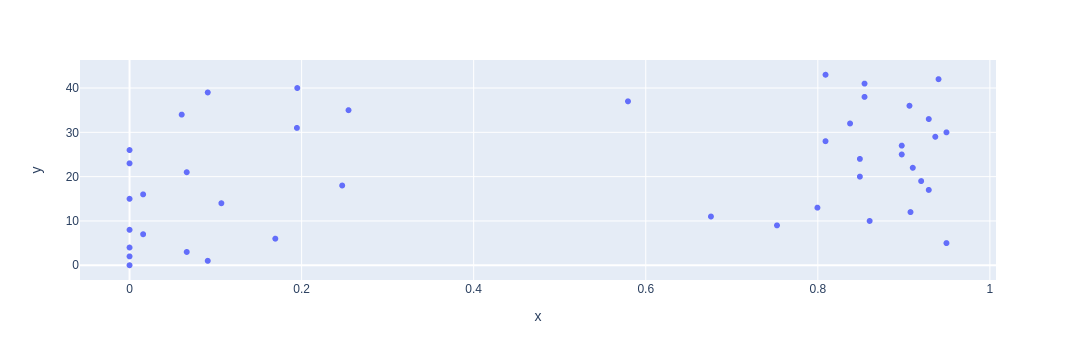

In [54]:
import plotly.express as px


y = np.arange(0,len(x),1)
fig = px.scatter( x=x, y=y)
fig.show() 